In [21]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

In [26]:
data = pd.read_csv('/content/drive/MyDrive/water/drinking_water_potability_train.csv')
data.dropna(inplace=True)
# ph=ph, Hardness=Twardość, Solids=Ciała_stałe, Chloramines=Chloraminy, Sulfate=Siarczany, Conductivity=Przewodność,
# Organic_carbon=Węgiel_organiczny, Trihalomethanes=Trihalometany, Turbidity=Zmętnienie, Potability=Zdatność_do_picia
data

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
3,8.316766,214.373394,22018.41744,8.059332,356.886136,363.266516,18.436525,100.341674,4.628771,0
4,9.092223,181.101509,17978.98634,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0
5,5.584087,188.313324,28748.68774,7.544869,326.678363,280.467916,8.399735,54.917862,2.559708,0
6,10.223862,248.071735,28749.71654,7.513408,393.663395,283.651634,13.789695,84.603556,2.672989,0
7,8.635849,203.361523,13672.09176,4.563009,303.309771,474.607645,12.363817,62.798309,4.401425,0
...,...,...,...,...,...,...,...,...,...,...
3267,8.989900,215.047358,15921.41202,6.297312,312.931021,390.410231,9.899115,55.069304,4.613843,1
3268,6.702547,207.321086,17246.92035,7.708117,304.510230,329.266002,16.217303,28.878601,3.442983,1
3269,11.491011,94.812545,37188.82602,9.263166,258.930600,439.893618,16.172755,41.558501,4.369264,1
3270,6.069616,186.659040,26138.78019,7.747547,345.700257,415.886955,12.067620,60.419921,3.669712,1


In [ ]:
# Decision tree with 3 layers
tree = DecisionTreeClassifier(max_depth = 3, random_state = 0)
# Training
tree.fit(data.loc[:,['ph', 'Hardness', 'Solids', 'Chloramines', 'Sulfate',	'Conductivity',
                      'Organic_carbon', 'Trihalomethanes', 'Turbidity']], data.Potability)
# Predicting
predictions = tree.predict(data.loc[:, ['ph', 'Hardness', 'Solids', 'Chloramines', 'Sulfate',	'Conductivity',
                      'Organic_carbon', 'Trihalomethanes', 'Turbidity']]) 
confusion_matrix(data.Potability, predictions)

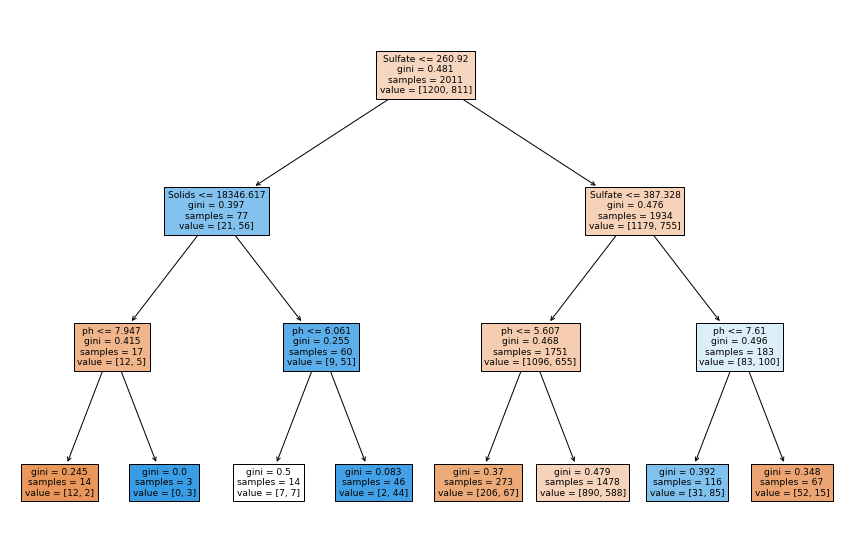

In [30]:
from numpy.ma.core import true_divide
names=['ph', 'Hardness', 'Solids', 'Chloramines', 'Sulfate',	'Conductivity',
                      'Organic_carbon', 'Trihalomethanes', 'Turbidity']
plt.subplots(figsize=(15, 10))
plot_tree(tree, feature_names=names, filled=True)
plt.show()